In [9]:
!unzip file.zip -d /content/unzipped_files

Archive:  file.zip
  inflating: /content/unzipped_files/Rice_Diseases/Bacterial Blight Disease/BB (1).jpg  
  inflating: /content/unzipped_files/Rice_Diseases/Bacterial Blight Disease/BB (10).jpg  
  inflating: /content/unzipped_files/Rice_Diseases/Bacterial Blight Disease/BB (11).jpg  
  inflating: /content/unzipped_files/Rice_Diseases/Bacterial Blight Disease/BB (12).jpg  
  inflating: /content/unzipped_files/Rice_Diseases/Bacterial Blight Disease/BB (13).jpg  
  inflating: /content/unzipped_files/Rice_Diseases/Bacterial Blight Disease/BB (14).jpg  
  inflating: /content/unzipped_files/Rice_Diseases/Bacterial Blight Disease/BB (15).jpg  
  inflating: /content/unzipped_files/Rice_Diseases/Bacterial Blight Disease/BB (16).jpg  
  inflating: /content/unzipped_files/Rice_Diseases/Bacterial Blight Disease/BB (17).jpg  
  inflating: /content/unzipped_files/Rice_Diseases/Bacterial Blight Disease/BB (18).jpg  
  inflating: /content/unzipped_files/Rice_Diseases/Bacterial Blight Disease/BB (19

In [10]:
import os
os.listdir("/content/unzipped_files")


['Rice_Diseases']

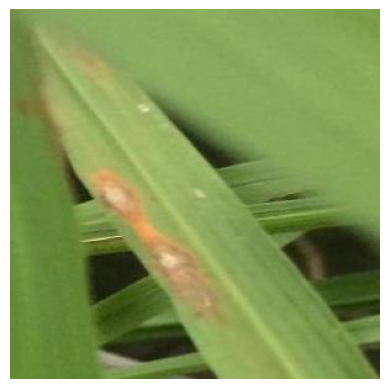

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Base directory
base_dir = "/content/unzipped_files/Rice_Diseases"

# Recursively find image files
image_files = []
for root, _, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg")):
            image_files.append(os.path.join(root, file))

# Display first image
if len(image_files) > 0:
    img = Image.open(image_files[5])

    # Use matplotlib to show the image
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.show()
else:
    print("No images found in dataset.")


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image_dataset_from_directory

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [13]:
# Path to your dataset (adjust if needed)
dataset_path = "/content/unzipped_files/Rice_Diseases"  # e.g., if you uploaded to Colab

# Hyperparameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
SEED = 123

# Create training dataset (80%)
train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='training',
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Create validation dataset (20%)
val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='validation',
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 200 files belonging to 4 classes.
Using 160 files for training.
Found 200 files belonging to 4 classes.
Using 40 files for validation.
Classes: ['Bacterial Blight Disease', 'Blast Disease', 'Brown Spot Disease', 'False Smut Disease']


In [14]:
# it is optional for autotune the model
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [15]:
# Image size
IMG_SIZE = (224, 224)

# Define Data Augmentation Layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),  # Randomly flip images horizontally
    layers.RandomRotation(0.2),       # Rotate images by up to 20%
    layers.RandomZoom(0.2),           # Random zooming
])

# Load Pretrained MobileNetV2 Model
base_model = MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,  # Remove classification layer
    weights='imagenet'  # Use pre-trained weights
)

# Freeze Base Model Layers
for layer in base_model.layers:
    layer.trainable = False

# Build the Model
inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)                     # Apply Data Augmentation
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)  # Normalize Input
x = base_model(x, training=False)                 # Pass through Base Model
x = layers.GlobalAveragePooling2D()(x)           # Global Pooling
x = layers.Dropout(0.2)(x)                        # Dropout for Regularization
outputs = layers.Dense(4, activation='softmax')(x)  # 4 classes

model = tf.keras.Model(inputs, outputs)



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Summary of the model

In [16]:
# Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display Model Summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

# Train the Model
Choose a small number of epochs (like 5–10) for a quick prototype. Increase if you have time/GPU.

In [18]:
EPOCHS = 5

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9150 - loss: 0.2795 - val_accuracy: 0.9750 - val_loss: 0.1605
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9041 - loss: 0.3287 - val_accuracy: 0.9750 - val_loss: 0.1344
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9467 - loss: 0.1911 - val_accuracy: 0.9750 - val_loss: 0.1466
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9730 - loss: 0.1790 - val_accuracy: 0.9750 - val_loss: 0.1374
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9802 - loss: 0.1413 - val_accuracy: 0.9750 - val_loss: 0.1123


# Evaluate the Model
After training (or fine-tuning), evaluate on the validation set:

In [19]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9797 - loss: 0.1158
Validation Loss: 0.1123
Validation Accuracy: 0.9750


In [20]:
model.save("rice_disease_model.keras")
print("Model saved as rice_disease_model.keras")


Model saved as rice_disease_model.keras


# Test Prediction on a Single Image


In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_disease(model, img_path):
    # Load and resize image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    # Convert to array
    img_array = image.img_to_array(img)
    # Expand dims to match model input shape: (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess for MobileNetV2
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

    # Predict
    preds = model.predict(img_array)
    class_idx = np.argmax(preds[0])
    class_name = class_names[class_idx]
    confidence = preds[0][class_idx] * 100

    print(f"Predicted Class: {class_name}")
    print(f"Confidence: {confidence:.2f}%")



In [23]:

# Example usage
test_image_path = "/content/rice-blast-diseases-on-leaf-260nw-2422855389.webp"
predict_disease(model, test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Brown Spot Disease
Confidence: 90.04%


In [24]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.6 MB/s eta 0:00:00


In [26]:
!wget -q -O - ipv4.icanhazip.com


!streamlit run app.py & npx localtunnel --port 8501

34.125.102.223


⠙⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.102.223:8501

y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://floppy-mirrors-agree.loca.lt
2025-04-24 05:40:19.921033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745473219.943611    5967 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745473219.950632    5967 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-24 05:40:23.854678: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:4